### **Zadanie: Počet segmentov rozbitého skla**  

#### **Cieľ:**  
Vašou úlohou je analyzovať obrázok rozbitého skla a spočítať počet jeho segmentov (úlomkov). Na výstupe je potrebné nielen vypísať počet segmentov, ale aj vizualizovať segmentovaný obrázok s označenými úlomkami.  

---

### **Postup riešenia:**  

1️⃣ **Predspracovanie obrázka:**  
   - Prevod obrázka do **odtieňov sivej (grayscale)**.  
   - Použitie **prahovania (thresholding)** alebo **adaptívnej binarizácie** na zvýraznenie úlomkov.  
   - Voliteľne: Použiť **Gaussov filter** na odstránenie šumu.  

2️⃣ **Detekcia segmentov:**  
   - Použitie `cv2.findContours()` na nájdenie jednotlivých úlomkov skla.  
   - Filtrovanie veľmi malých segmentov na základe **povrchovej plochy**.  

3️⃣ **Výstup:**  
   - Vypísať **počet segmentov**.  
   - Vizualizovať segmentovaný obrázok s vyznačenými úlomkami.  

---

### **Požiadavky na výstup:**  
✅ **Počet segmentov** v obrázku (výpis do konzoly).  
✅ **Segmentovaný obrázok**, kde sú úlomky vyznačené rôznymi farbami.  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, transform
from skimage.color import rgb2gray
from typing import Tuple, Optional, List, Dict
from scipy import ndimage, signal

In [ ]:
path = "/content/BlogPostPic4.jpg"
img = io.imread(path)

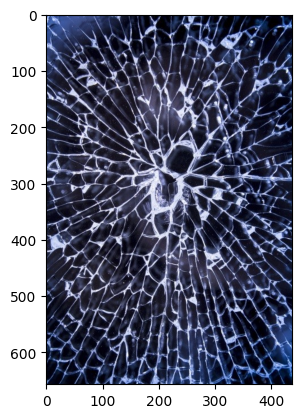

In [ ]:
plt.imshow(img)
plt.show()

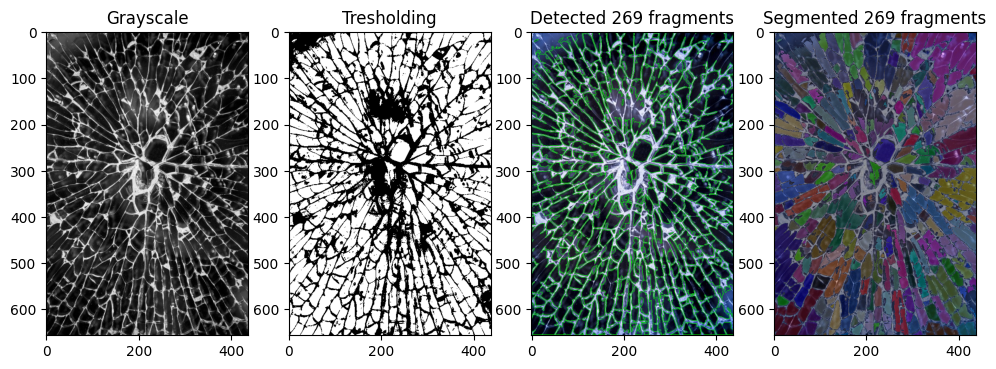

Number of glass fragments: 269


In [19]:
def DmytroVarich(
    img: np.ndarray,
    show_img: bool = False,
) -> int:
    # Convert the image to grayscale and convert to uint8
    img_gray = rgb2gray(img)
    img_gray = (img_gray * 255).astype(np.uint8)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(img_gray, (3,3), 0)

    # Applying binarization
    _, thresh = cv2.threshold(img_gray, 55, 255, cv2.THRESH_BINARY_INV)

    # Finding the contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Area filtering (remove pieces that are too small)
    min_area = 15
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Creating the mask for filling
    mask = np.zeros_like(img, np.uint8)

    # Filling each segment with a random color
    for cnt in filtered_contours:
      color = np.random.randint(0, 255, (3,), dtype=int)
      cv2.fillPoly(mask, [cnt], color.tolist())

    # Overlaying a mask on the original image
    segmented_img = cv2.addWeighted(img, 0.6, mask, 0.4, 0) # Transpsrency 40%

    # Vizualization
    if show_img:
        # Draw contours on the original image
        img_copy = img.copy()
        cv2.drawContours(img_copy, filtered_contours, -1, (0, 255, 0), 1)

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 4, 1)
        plt.imshow(img_gray, cmap="gray")
        plt.title("Grayscale")

        plt.subplot(1, 4, 2)
        plt.imshow(thresh, cmap="gray")
        plt.title("Tresholding")

        plt.subplot(1, 4, 3)
        plt.imshow(img_copy)
        plt.title(f"Detected {len(filtered_contours)} fragments")

        plt.subplot(1, 4, 4)
        plt.imshow(segmented_img)
        plt.title(f"Segmented {len(filtered_contours)} fragments")

        plt.show()

    return len(filtered_contours)

num_fragments  = DmytroVarich(img, True)
print("Number of glass fragments:", num_fragments)